### 유전체 정보 품종 분류 AI 경진대회

https://dacon.io/competitions/official/236035/data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random

In [2]:
pd.read_csv('/content/snp_info.csv')

,SNP_id,name,chrom,cm,pos
0,SNP_01,BTA-19852-no-rs,2,67.05460,42986890
1,SNP_02,ARS-USMARC-Parent-DQ647190-rs29013632,6,31.15670,13897068
2,SNP_03,ARS-BFGL-NGS-117009,6,68.28920,44649549
3,SNP_04,ARS-BFGL-NGS-60567,6,77.87490,53826064
4,SNP_05,BovineHD0600017032,6,80.50150,61779512
5,SNP_06,BovineHD0600017424,6,80.59540,63048481
6,SNP_07,Hapmap49442-BTA-111073,6,80.78000,64037334
7,SNP_08,BovineHD0600018638,6,82.68560,67510588
8,SNP_09,ARS-BFGL-NGS-37727,6,86.87400,73092782
9,SNP_10,BTB-01558306,7,62.06920,40827112


In [3]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

train.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C


In [4]:
test.head()

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15
0,TEST_000,0,0,0,1,A G,G G,A A,G A,A A,A G,G G,G A,G A,A G,A G,G A,G G,C A,G A
1,TEST_001,0,0,0,2,G G,A G,C C,G G,C C,A A,A A,A A,A A,G G,A G,A A,A A,A A,A A
2,TEST_002,0,0,0,2,G G,A G,A A,A A,C A,A G,A A,A A,A A,A G,A A,G A,G G,A A,G G
3,TEST_003,0,0,0,2,G G,A G,C A,A A,C C,A A,A A,A A,A A,G G,A A,G A,A G,A A,A A
4,TEST_004,0,0,0,1,A A,G G,A A,G G,A A,G G,G G,A A,G G,A G,G G,G A,G G,A A,G G


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      262 non-null    object
 1   father  262 non-null    int64 
 2   mother  262 non-null    int64 
 3   gender  262 non-null    int64 
 4   trait   262 non-null    int64 
 5   SNP_01  262 non-null    object
 6   SNP_02  262 non-null    object
 7   SNP_03  262 non-null    object
 8   SNP_04  262 non-null    object
 9   SNP_05  262 non-null    object
 10  SNP_06  262 non-null    object
 11  SNP_07  262 non-null    object
 12  SNP_08  262 non-null    object
 13  SNP_09  262 non-null    object
 14  SNP_10  262 non-null    object
 15  SNP_11  262 non-null    object
 16  SNP_12  262 non-null    object
 17  SNP_13  262 non-null    object
 18  SNP_14  262 non-null    object
 19  SNP_15  262 non-null    object
 20  class   262 non-null    object
dtypes: int64(4), object(17)
memory usage: 43.1+ KB


In [6]:
train.isna().sum()

id        0
father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
class     0
dtype: int64

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      175 non-null    object
 1   father  175 non-null    int64 
 2   mother  175 non-null    int64 
 3   gender  175 non-null    int64 
 4   trait   175 non-null    int64 
 5   SNP_01  175 non-null    object
 6   SNP_02  175 non-null    object
 7   SNP_03  175 non-null    object
 8   SNP_04  175 non-null    object
 9   SNP_05  175 non-null    object
 10  SNP_06  175 non-null    object
 11  SNP_07  175 non-null    object
 12  SNP_08  175 non-null    object
 13  SNP_09  175 non-null    object
 14  SNP_10  175 non-null    object
 15  SNP_11  175 non-null    object
 16  SNP_12  175 non-null    object
 17  SNP_13  175 non-null    object
 18  SNP_14  175 non-null    object
 19  SNP_15  175 non-null    object
dtypes: int64(4), object(16)
memory usage: 27.5+ KB


In [8]:
test.isna().sum()

id        0
father    0
mother    0
gender    0
trait     0
SNP_01    0
SNP_02    0
SNP_03    0
SNP_04    0
SNP_05    0
SNP_06    0
SNP_07    0
SNP_08    0
SNP_09    0
SNP_10    0
SNP_11    0
SNP_12    0
SNP_13    0
SNP_14    0
SNP_15    0
dtype: int64

In [9]:
train.nunique()

id        262
father      1
mother      1
gender      1
trait       2
SNP_01      3
SNP_02      3
SNP_03      3
SNP_04      3
SNP_05      3
SNP_06      3
SNP_07      3
SNP_08      3
SNP_09      3
SNP_10      3
SNP_11      3
SNP_12      3
SNP_13      3
SNP_14      3
SNP_15      3
class       3
dtype: int64

In [10]:
test.nunique()

id        175
father      1
mother      1
gender      1
trait       2
SNP_01      3
SNP_02      3
SNP_03      3
SNP_04      3
SNP_05      3
SNP_06      3
SNP_07      3
SNP_08      3
SNP_09      3
SNP_10      3
SNP_11      3
SNP_12      3
SNP_13      3
SNP_14      3
SNP_15      3
dtype: int64

father, mother, gender는 유일값이 1개인 필요없는 칼럼

In [11]:
train['trait'].value_counts()

2    193
1     69
Name: trait, dtype: int64

개체 표현형 정보는 종류가 2가지, '2'가 다수

In [12]:
pd.pivot_table(train, index=['trait', 'class'],
               values='id',
               aggfunc='count')

id
trait class     
1     A       69
2     B      114
      C       79

개체 표현형 정보가 '1'인 경우는 무조건 A품종

'2'일 때, 중 품종이 B인 경우가 더 많다

<Axes: xlabel='trait', ylabel='count'>

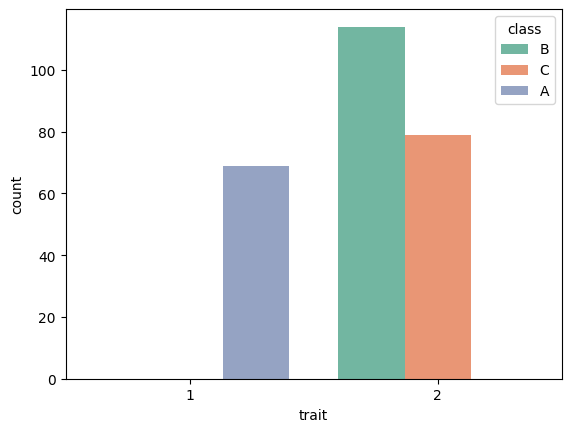

In [31]:
sns.countplot(train, x='trait', hue='class', palette='Set2')

In [15]:
train = train.iloc[:, 4:]
test = test.iloc[:, 4:]

In [16]:
train.head(3)

,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,SNP_06,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,2,G G,A G,A A,G A,C A,A A,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,2,A G,A G,C A,A A,A A,A G,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,2,G G,G G,A A,G A,C C,G G,A A,G A,G A,A G,A A,A A,A A,A A,A A,B


In [20]:
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1, 16)]
snp_col

['SNP_01',
 'SNP_02',
 'SNP_03',
 'SNP_04',
 'SNP_05',
 'SNP_06',
 'SNP_07',
 'SNP_08',
 'SNP_09',
 'SNP_10',
 'SNP_11',
 'SNP_12',
 'SNP_13',
 'SNP_14',
 'SNP_15']

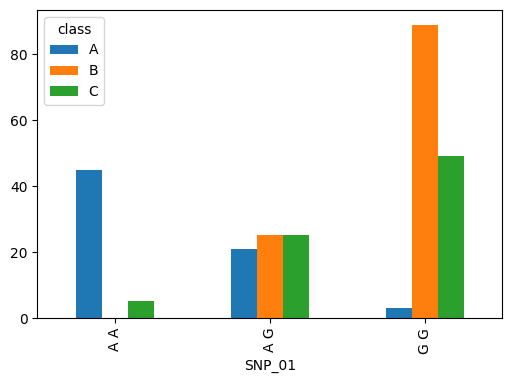

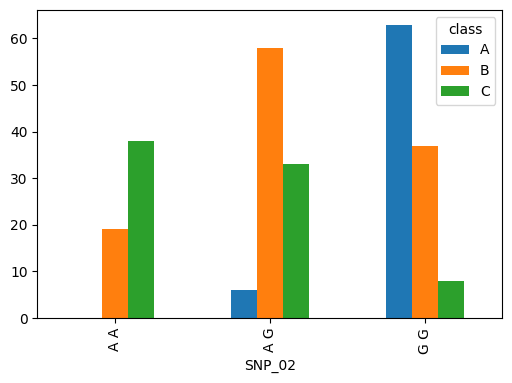

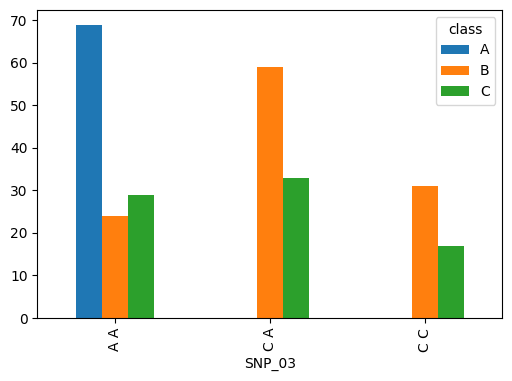

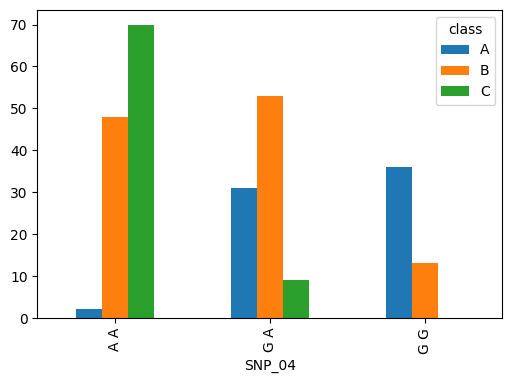

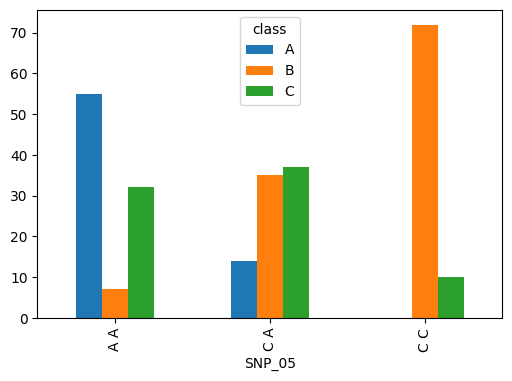

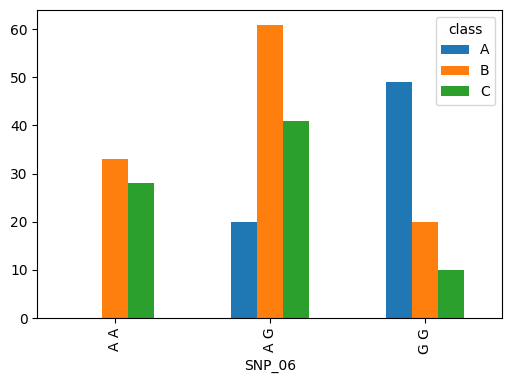

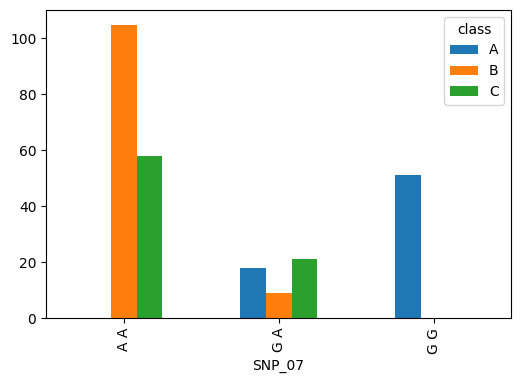

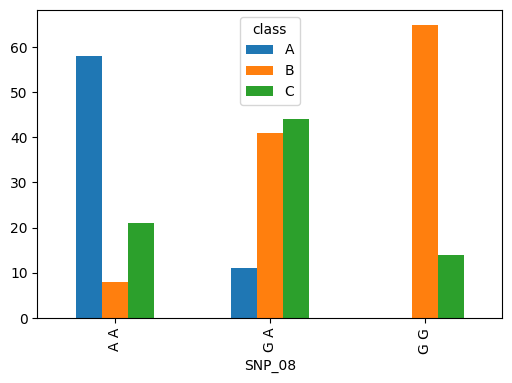

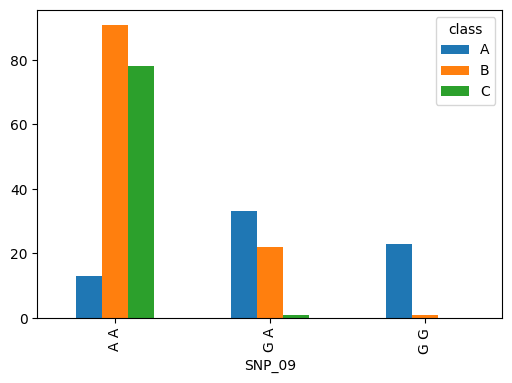

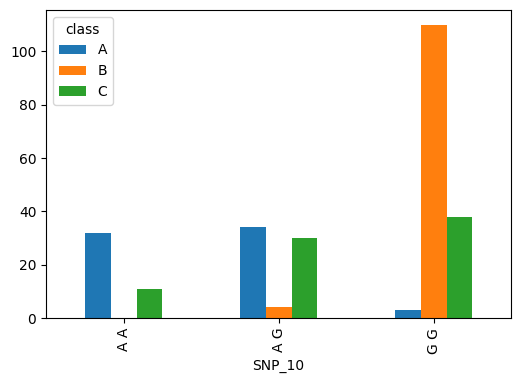

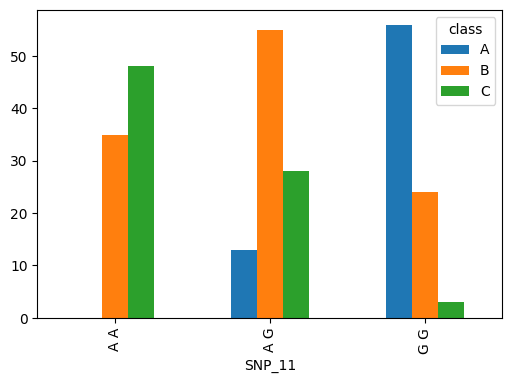

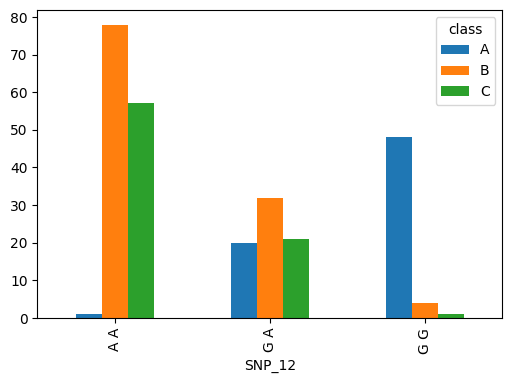

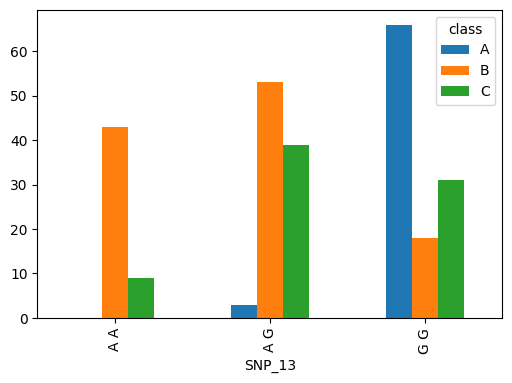

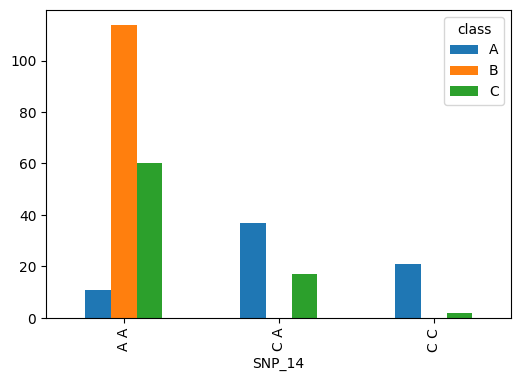

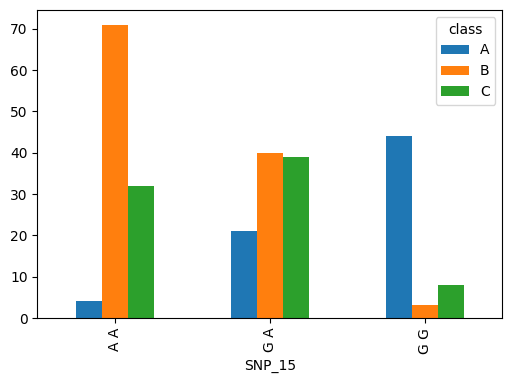

In [30]:
for i in snp_col:
  train.groupby(i)['class'].value_counts().unstack().plot.bar(figsize=(6,4))